## 공공데이터 포털
1.1 공공데이터 포털 가입 https://www.data.go.kr

1.2 앱 ID 등록(개발자 계정)

각 서비스 별로 신청

### 출입국관광통계서비스
- 사이트에서 검색 후 활용 신청
- 출입국관광통계조회

In [36]:
import requests
import os
import sys
import datetime
import time

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [37]:
import matplotlib.pylab as plt
import matplotlib
from matplotlib import font_manager, rc

serviceKey는 신청 할때마다 바꿔줘야함 
- 중국:112  일본:130   미국:275

In [44]:
url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
serviceKey='2lOLIoOQ2WJbS7eE2X95RcCn85knN31n2iHIUcenqqXTyc2sd9sNjAJrTKgkf480OdxmfVPokwFjbBVnTshQ6Q%3D%3D'
serviceKey = requests.utils.unquote(serviceKey)
params = {
    '_type' : 'json',
    'serviceKey' : serviceKey,
    'YM' : '202004',
    'NAT_CD' : '112',
    'ED_CD' : 'E'
}
response = requests.get(url, params=params)
# response.status_code
response.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>0000</resultCode><resultMsg>OK</resultMsg></header><body><items><item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>112</natCd><natKorNm>중  국</natKorNm><num>3935</num><rnum>1</rnum><ym>202004</ym></item></items><numOfRows>10</numOfRows><pageNo>1</pageNo><totalCount>1</totalCount></body></response>'

In [49]:
def get_request_url(ym,nat_cd,ed_cd='E'):
    try:
        url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
        serviceKey='2lOLIoOQ2WJbS7eE2X95RcCn85knN31n2iHIUcenqqXTyc2sd9sNjAJrTKgkf480OdxmfVPokwFjbBVnTshQ6Q%3D%3D'
        serviceKey = requests.utils.unquote(serviceKey)
        params = {
            '_type' : 'json',
            'serviceKey' : serviceKey,
            'YM' : ym,
            'NAT_CD' : nat_cd,
            'ED_CD' : ed_cd
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            rs_str = '{} Url Request Success'
            print(rs_str.format(datetime.datetime.now()))
            return response.json()
        else:
            print('status_code:'+response.status_code)
            return None
    except Exception as e:
        print(e)
        return None

In [54]:
ym = '200501'
nat_cd = '275'
response = get_request_url(ym,nat_cd,ed_cd='E')
response

2020-06-11 14:38:23.373015 Url Request Success


{'response': {'header': {'resultCode': '0000', 'resultMsg': 'OK'},
  'body': {'items': {'item': {'ed': '방한외래관광객',
     'edCd': 'E',
     'natCd': 275,
     'natKorNm': '미  국',
     'num': 34769,
     'rnum': 1,
     'ym': 200501}},
   'numOfRows': 10,
   'pageNo': 1,
   'totalCount': 1}}}

In [70]:
# def main():
jsonResult = list()
nStartYear = 2005
nEndYear = 2020
nat_cd = '275'   #미국
for year in range(nStartYear,nEndYear):
    for month in range(1,13):
        ym = '{0}{1:0>2}'.format(str(year),str(month))
#             print(ym)
        response = get_request_url(ym,nat_cd,ed_cd='E')
        check = response['response']['header']['resultMsg']
        if (check =='OK'):
            natKorNm = response['response']['body']['items']['item']['natKorNm']
            num = response['response']['body']['items']['item']['num']                
            item = {
                'natKorNm' : natKorNm,
                'natCd' : nat_cd,
                'yyyymm' : ym,
                'visit_cnt' : num
            }
            jsonResult.append(item)

2020-06-11 15:11:32.438238 Url Request Success
2020-06-11 15:11:32.456191 Url Request Success
2020-06-11 15:11:32.476138 Url Request Success
2020-06-11 15:11:32.494089 Url Request Success
2020-06-11 15:11:32.513039 Url Request Success
2020-06-11 15:11:32.529993 Url Request Success
2020-06-11 15:11:32.549940 Url Request Success
2020-06-11 15:11:32.570884 Url Request Success
2020-06-11 15:11:32.586843 Url Request Success
2020-06-11 15:11:32.603796 Url Request Success
2020-06-11 15:11:32.621748 Url Request Success
2020-06-11 15:11:32.638774 Url Request Success
2020-06-11 15:11:32.655676 Url Request Success
2020-06-11 15:11:32.671692 Url Request Success
2020-06-11 15:11:32.688647 Url Request Success
2020-06-11 15:11:32.705550 Url Request Success
2020-06-11 15:11:32.720504 Url Request Success
2020-06-11 15:11:32.736515 Url Request Success
2020-06-11 15:11:32.752423 Url Request Success
2020-06-11 15:11:32.767430 Url Request Success
2020-06-11 15:11:32.785335 Url Request Success
2020-06-11 15

2020-06-11 15:11:35.989744 Url Request Success
2020-06-11 15:11:36.014678 Url Request Success
2020-06-11 15:11:36.036618 Url Request Success
2020-06-11 15:11:36.056565 Url Request Success


In [71]:
len(jsonResult)

180

In [73]:
import json

In [74]:
fn = '해외방문객정보.json'
with open(fn, 'w', encoding='utf-8') as outfile:
    retJson = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
    outfile.write(retJson)

In [75]:
cnVisit = []
visitYM = []
index = []
i = 0
for item in jsonResult:
    index.append(i)
    cnVisit.append(item['visit_cnt'])
    visitYM.append(item['yyyymm'])
    i = i + 1

In [77]:
cnVisit[0],visitYM[0],index[0]

(34769, '200501', 0)

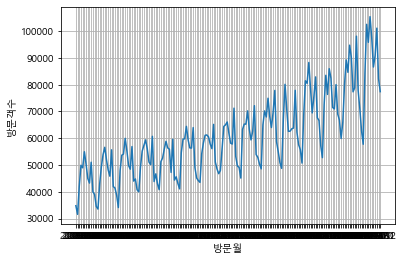

In [79]:
#한글처리 
font_loca = 'c:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_loca).get_name()
matplotlib.rc('font',family=font_name)

#그래프 그리기
plt.xticks(index,visitYM)
plt.plot(index, cnVisit)
plt.xlabel('방문월')
plt.ylabel('방문객수')
plt.grid(True)
plt.show()

## 관광자원통계서비스
전국 유료 관광지 입장객 정보 수집

In [84]:
def get_request_url2(ym,sido,gungu,res_nm,page_no,num_rows):
    try:
        url = 'http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList'
        serviceKey='2lOLIoOQ2WJbS7eE2X95RcCn85knN31n2iHIUcenqqXTyc2sd9sNjAJrTKgkf480OdxmfVPokwFjbBVnTshQ6Q%3D%3D'
        serviceKey = requests.utils.unquote(serviceKey)
        params = {
            '_type' : 'json',
            'serviceKey' : serviceKey,
            'YM' : ym,
            'SIDO' : sido,
            'GUNGU' : gungu,
            'RES_NM' : res_nm,
            'pageNo' : page_no,
            'numOfRows' : num_rows
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            rs_str = '{} Url Request Success'
            print(rs_str.format(datetime.datetime.now()))
            return response.json()
        else:
            print('status_code:'+response.status_code)
            return None
    except Exception as e:
        print(e)
        return None

In [ ]:
def getToutPointData(item,ym,jsonResult2):

    addrCd = 0 if 'addrCd' not in item.keys() else item['addrCd']
    gungu = '' if 'gungu' not in item.keys() else item['gungu']
    sido = '' if 'sido' not in item.keys() else item['sido']
    resNm = '' if 'resNm' not in item.keys() else item['resNm']
    rnum = i0 if 'rnum' not in item.keys() else item['rnum']
    csForCnt = 0 if 'csForCnt' not in item.keys() else item['csForCnt']
    csNatCnt = 0 if 'csNatCnt' not in item.keys() else item['csNatCnt']
    
    data = {
            'ym' : ym,
            'addrCd' : addrCd,
            'gungu' : gungu,
            'sido' : sido,
            'resNm' : resNm,
            'rnum' : rnum,
            'csForCnt' : csForCnt,
            'csNatCnt' : csNatCnt,
    }
    jsonResult2.append(data)

In [96]:
jsonResult2 = []
nStartYear = 2011
nEndYear = 2017
sido = '서울특별시'
gungu = ''
res_nm = ''
page_no = 1
num_rows = 100
for year in range(nStartYear,nEndYear):
    for month in range(1,13):
        ym = '{0}{1:0>2}'.format(str(year),str(month))
        response = get_request_url2(ym,sido,gungu,res_nm,page_no,num_rows)
        if(response['response']['header']['resultMsg'] == 'OK'):
            nTotal = response['response']['body']['totalCount']
            if nTotal == 0 :
                break
            items = response['response']['body']['items']['item']
            for item in items:
                print(item)
#                 addrCd = 0 if 'addrCd' not in item.keys() else item['addrCd']
#                 gungu = '' if 'gungu' not in item.keys() else item['gungu']
#                 sido = '' if 'sido' not in item.keys() else item['sido']
#                 resNm = '' if 'resNm' not in item.keys() else item['resNm']
#                 rnum = i0 if 'rnum' not in item.keys() else item['rnum']
#                 csForCnt = 0 if 'csForCnt' not in item.keys() else item['csForCnt']
#                 csNatCnt = 0 if 'csNatCnt' not in item.keys() else item['csNatCnt']
    
#                 data = {
#                         'ym' : ym,
#                         'addrCd' : addrCd,
#                         'gungu' : gungu,
#                         'sido' : sido,
#                         'resNm' : resNm,
#                         'rnum' : rnum,
#                         'csForCnt' : csForCnt,
#                         'csNatCnt' : csNatCnt,
#                 }
#                 jsonResult2.append(data)


2020-06-11 16:44:30.186394 Url Request Success
{'addrCd': 1111, 'csForCnt': 14137, 'csNatCnt': 43677, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201101}
{'addrCd': 1111, 'csNatCnt': 6523, 'gungu': '종로구', 'resNm': '운현궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201101}
{'addrCd': 1111, 'csForCnt': 40224, 'csNatCnt': 141183, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201101}
{'addrCd': 1111, 'csForCnt': 697, 'csNatCnt': 17644, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 4, 'sido': '서울특별시', 'ym': 201101}
{'addrCd': 1111, 'csForCnt': 6837, 'csNatCnt': 11486, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 5, 'sido': '서울특별시', 'ym': 201101}
{'addrCd': 1117, 'csNatCnt': 260272, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 6, 'sido': '서울특별시', 'ym': 201101}
{'addrCd': 1111, 'csNatCnt': 57787, 'gungu': '종로구', 'resNm': '서울역사박물관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201101}
{'addrCd': 1114, 'csForCnt': 5743, 'csNatCnt': 92135, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 8, 'sido'

2020-06-11 16:44:30.898466 Url Request Success
{'addrCd': 1111, 'csForCnt': 33502, 'csNatCnt': 91527, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201107}
{'addrCd': 1111, 'csNatCnt': 10498, 'gungu': '종로구', 'resNm': '운현궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201107}
{'addrCd': 1111, 'csForCnt': 141034, 'csNatCnt': 275074, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201107}
{'addrCd': 1111, 'csForCnt': 2415, 'csNatCnt': 31333, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 4, 'sido': '서울특별시', 'ym': 201107}
{'addrCd': 1111, 'csForCnt': 17675, 'csNatCnt': 25886, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 5, 'sido': '서울특별시', 'ym': 201107}
{'addrCd': 1117, 'csNatCnt': 331836, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 6, 'sido': '서울특별시', 'ym': 201107}
{'addrCd': 1111, 'csNatCnt': 116639, 'gungu': '종로구', 'resNm': '서울역사박물관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201107}
{'addrCd': 1114, 'csForCnt': 11172, 'csNatCnt': 81544, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 8, 

2020-06-11 16:44:31.632502 Url Request Success
{'addrCd': 1111, 'csForCnt': 32210, 'csNatCnt': 31760, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201201}
{'addrCd': 1111, 'csForCnt': 1093, 'csNatCnt': 6907, 'gungu': '종로구', 'resNm': '운현궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201201}
{'addrCd': 1111, 'csForCnt': 109310, 'csNatCnt': 114505, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201201}
{'addrCd': 1111, 'csForCnt': 2295, 'csNatCnt': 17458, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 4, 'sido': '서울특별시', 'ym': 201201}
{'addrCd': 1111, 'csForCnt': 12293, 'csNatCnt': 5856, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 5, 'sido': '서울특별시', 'ym': 201201}
{'addrCd': 1117, 'csForCnt': 6106, 'csNatCnt': 229035, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 6, 'sido': '서울특별시', 'ym': 201201}
{'addrCd': 1111, 'csForCnt': 1161, 'csNatCnt': 93801, 'gungu': '종로구', 'resNm': '서울역사박물관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201201}
{'addrCd': 1114, 'csForCnt': 14033, 'csNatCnt'

2020-06-11 16:44:32.123192 Url Request Success
{'addrCd': 1111, 'csForCnt': 65797, 'csNatCnt': 133635, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201205}
{'addrCd': 1111, 'csForCnt': 2631, 'csNatCnt': 24690, 'gungu': '종로구', 'resNm': '운현궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201205}
{'addrCd': 1111, 'csForCnt': 117936, 'csNatCnt': 481103, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201205}
{'addrCd': 1111, 'csForCnt': 4117, 'csNatCnt': 80267, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 4, 'sido': '서울특별시', 'ym': 201205}
{'addrCd': 1111, 'csForCnt': 24439, 'csNatCnt': 27823, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 5, 'sido': '서울특별시', 'ym': 201205}
{'addrCd': 1117, 'csForCnt': 15689, 'csNatCnt': 306757, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 6, 'sido': '서울특별시', 'ym': 201205}
{'addrCd': 1111, 'csForCnt': 2123, 'csNatCnt': 269387, 'gungu': '종로구', 'resNm': '서울역사박물관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201205}
{'addrCd': 1114, 'csForCnt': 17252, 'csNa

2020-06-11 16:44:32.623850 Url Request Success
{'addrCd': 1111, 'csForCnt': 52775, 'csNatCnt': 76660, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201209}
{'addrCd': 1111, 'csForCnt': 3209, 'csNatCnt': 34242, 'gungu': '종로구', 'resNm': '운현궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201209}
{'addrCd': 1111, 'csForCnt': 106412, 'csNatCnt': 296957, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201209}
{'addrCd': 1111, 'csForCnt': 2736, 'csNatCnt': 42107, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 4, 'sido': '서울특별시', 'ym': 201209}
{'addrCd': 1111, 'csForCnt': 22209, 'csNatCnt': 13121, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 5, 'sido': '서울특별시', 'ym': 201209}
{'addrCd': 1117, 'csForCnt': 13725, 'csNatCnt': 219211, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 6, 'sido': '서울특별시', 'ym': 201209}
{'addrCd': 1111, 'csForCnt': 1666, 'csNatCnt': 175273, 'gungu': '종로구', 'resNm': '서울역사박물관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201209}
{'addrCd': 1114, 'csForCnt': 11711, 'csNat

2020-06-11 16:44:33.274114 Url Request Success
{'addrCd': 1111, 'csForCnt': 43988, 'csNatCnt': 54054, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201303}
{'addrCd': 1111, 'csForCnt': 119793, 'csNatCnt': 179912, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201303}
{'addrCd': 1111, 'csForCnt': 3100, 'csNatCnt': 36389, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201303}
{'addrCd': 1111, 'csForCnt': 15635, 'csNatCnt': 13138, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 4, 'sido': '서울특별시', 'ym': 201303}
{'addrCd': 1117, 'csForCnt': 10418, 'csNatCnt': 196436, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 5, 'sido': '서울특별시', 'ym': 201303}
{'addrCd': 1114, 'csForCnt': 12102, 'csNatCnt': 77718, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 6, 'sido': '서울특별시', 'ym': 201303}
{'addrCd': 1135, 'csForCnt': 25, 'csNatCnt': 4849, 'gungu': '노원구', 'resNm': '태릉 ·  강릉 · 조선왕릉전시관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201303}
{'addrCd': 1141, 'csNatCnt': 24100,

2020-06-11 16:44:33.866534 Url Request Success
{'addrCd': 1111, 'csForCnt': 39392, 'csNatCnt': 97864, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201309}
{'addrCd': 1111, 'csForCnt': 144685, 'csNatCnt': 319869, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201309}
{'addrCd': 1111, 'csForCnt': 2227, 'csNatCnt': 56914, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201309}
{'addrCd': 1111, 'csForCnt': 11689, 'csNatCnt': 20382, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 4, 'sido': '서울특별시', 'ym': 201309}
{'addrCd': 1117, 'csForCnt': 13225, 'csNatCnt': 226526, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 5, 'sido': '서울특별시', 'ym': 201309}
{'addrCd': 1114, 'csForCnt': 13769, 'csNatCnt': 97658, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 6, 'sido': '서울특별시', 'ym': 201309}
{'addrCd': 1135, 'csForCnt': 30, 'csNatCnt': 4188, 'gungu': '노원구', 'resNm': '태릉 ·  강릉 · 조선왕릉전시관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201309}
{'addrCd': 1141, 'csForCnt': 6201, 

{'addrCd': 1168, 'csForCnt': 1251, 'csNatCnt': 40860, 'gungu': '강남구', 'resNm': '선릉·정릉', 'rnum': 12, 'sido': '서울특별시', 'ym': 201404}
2020-06-11 16:44:34.602582 Url Request Success
{'addrCd': 1111, 'csForCnt': 44392, 'csNatCnt': 143694, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201405}
{'addrCd': 1111, 'csForCnt': 162319, 'csNatCnt': 457248, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201405}
{'addrCd': 1111, 'csForCnt': 4220, 'csNatCnt': 100809, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201405}
{'addrCd': 1111, 'csForCnt': 9195, 'csNatCnt': 53528, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 4, 'sido': '서울특별시', 'ym': 201405}
{'addrCd': 1117, 'csForCnt': 11508, 'csNatCnt': 338536, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 5, 'sido': '서울특별시', 'ym': 201405}
{'addrCd': 1114, 'csForCnt': 16745, 'csNatCnt': 100802, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 6, 'sido': '서울특별시', 'ym': 201405}
{'addrCd': 1135, 'csForCnt': 21, 'csNatCnt

2020-06-11 16:44:35.162107 Url Request Success
{'addrCd': 1111, 'csForCnt': 47051, 'csNatCnt': 136085, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201411}
{'addrCd': 1111, 'csForCnt': 164220, 'csNatCnt': 288936, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201411}
{'addrCd': 1111, 'csForCnt': 3668, 'csNatCnt': 75897, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201411}
{'addrCd': 1111, 'csForCnt': 6022, 'csNatCnt': 15959, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 4, 'sido': '서울특별시', 'ym': 201411}
{'addrCd': 1117, 'csForCnt': 8967, 'csNatCnt': 197616, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 5, 'sido': '서울특별시', 'ym': 201411}
{'addrCd': 1114, 'csForCnt': 19173, 'csNatCnt': 123477, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 6, 'sido': '서울특별시', 'ym': 201411}
{'addrCd': 1135, 'csForCnt': 9, 'csNatCnt': 4055, 'gungu': '노원구', 'resNm': '태릉 ·  강릉 · 조선왕릉전시관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201411}
{'addrCd': 1141, 'csForCnt': 5443, '

2020-06-11 16:44:35.817313 Url Request Success
{'addrCd': 1111, 'csForCnt': 20021, 'csNatCnt': 39425, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201506}
{'addrCd': 1111, 'csForCnt': 31822, 'csNatCnt': 155024, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201506}
{'addrCd': 1111, 'csForCnt': 1890, 'csNatCnt': 19369, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201506}
{'addrCd': 1111, 'csForCnt': 2832, 'csNatCnt': 6964, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 4, 'sido': '서울특별시', 'ym': 201506}
{'addrCd': 1117, 'csForCnt': 6992, 'csNatCnt': 86464, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 5, 'sido': '서울특별시', 'ym': 201506}
{'addrCd': 1114, 'csForCnt': 7547, 'csNatCnt': 55601, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 6, 'sido': '서울특별시', 'ym': 201506}
{'addrCd': 1135, 'csForCnt': 16, 'csNatCnt': 6645, 'gungu': '노원구', 'resNm': '태릉 ·  강릉 · 조선왕릉전시관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201506}
{'addrCd': 1141, 'csForCnt': 689, 'csNatC

2020-06-11 16:44:36.486521 Url Request Success
{'addrCd': 1111, 'csForCnt': 24620, 'csNatCnt': 49472, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201601}
{'addrCd': 1111, 'csForCnt': 193821, 'csNatCnt': 144022, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201601}
{'addrCd': 1111, 'csForCnt': 1696, 'csNatCnt': 22043, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201601}
{'addrCd': 1111, 'csForCnt': 2902, 'csNatCnt': 12436, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 4, 'sido': '서울특별시', 'ym': 201601}
{'addrCd': 1117, 'csForCnt': 14074, 'csNatCnt': 363327, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 5, 'sido': '서울특별시', 'ym': 201601}
{'addrCd': 1114, 'csForCnt': 12205, 'csNatCnt': 54352, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 6, 'sido': '서울특별시', 'ym': 201601}
{'addrCd': 1135, 'csForCnt': 6, 'csNatCnt': 1544, 'gungu': '노원구', 'resNm': '태릉 ·  강릉 · 조선왕릉전시관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201601}
{'addrCd': 1141, 'csForCnt': 4375, 'c

2020-06-11 16:44:37.124817 Url Request Success
{'addrCd': 1111, 'csForCnt': 41816, 'csNatCnt': 56511, 'gungu': '종로구', 'resNm': '창덕궁', 'rnum': 1, 'sido': '서울특별시', 'ym': 201607}
{'addrCd': 1111, 'csForCnt': 352717, 'csNatCnt': 220865, 'gungu': '종로구', 'resNm': '경복궁', 'rnum': 2, 'sido': '서울특별시', 'ym': 201607}
{'addrCd': 1111, 'csForCnt': 3931, 'csNatCnt': 54844, 'gungu': '종로구', 'resNm': '창경궁', 'rnum': 3, 'sido': '서울특별시', 'ym': 201607}
{'addrCd': 1111, 'csForCnt': 6164, 'csNatCnt': 12620, 'gungu': '종로구', 'resNm': '종묘', 'rnum': 4, 'sido': '서울특별시', 'ym': 201607}
{'addrCd': 1117, 'csForCnt': 20934, 'csNatCnt': 283826, 'gungu': '용산구', 'resNm': '국립중앙박물관', 'rnum': 5, 'sido': '서울특별시', 'ym': 201607}
{'addrCd': 1114, 'csForCnt': 27566, 'csNatCnt': 106114, 'gungu': '중구', 'resNm': '덕수궁', 'rnum': 6, 'sido': '서울특별시', 'ym': 201607}
{'addrCd': 1135, 'csForCnt': 49, 'csNatCnt': 3454, 'gungu': '노원구', 'resNm': '태릉 ·  강릉 · 조선왕릉전시관', 'rnum': 7, 'sido': '서울특별시', 'ym': 201607}
{'addrCd': 1141, 'csForCnt': 5030, 